In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime

from sklearn.impute import SimpleImputer


In [2]:
# Get data
hd =pd.read_csv("heart_disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
hd = hd.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [5]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


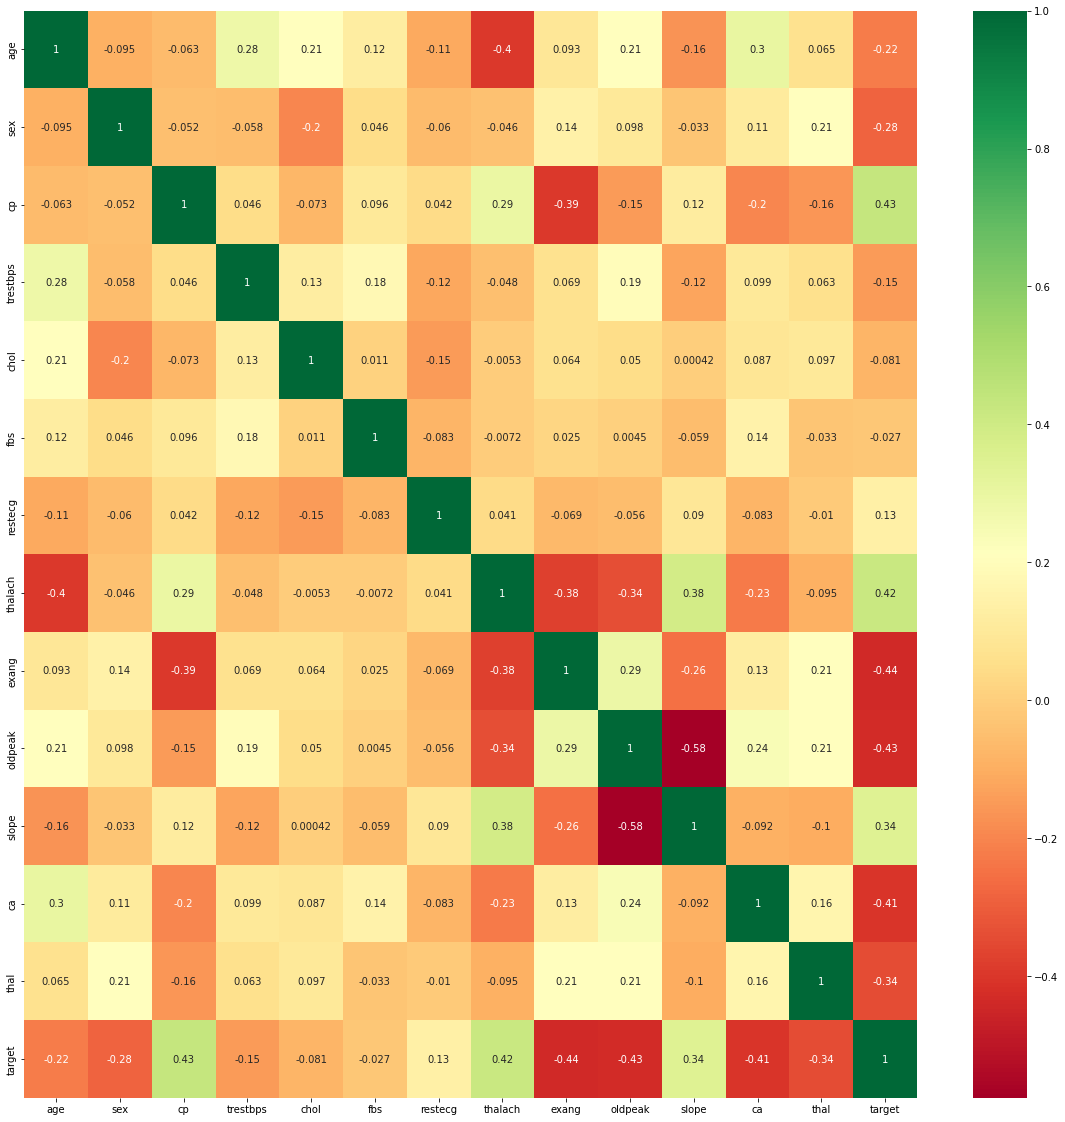

In [6]:
# data features plot

cor_mat = hd.corr()
top_featr = cor_mat.index
plt.figure(figsize=(20,20))

sns.heatmap(hd[top_featr].corr(),annot =True,cmap='RdYlGn');

In [7]:
# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

In [8]:
# Creating and fitting model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

score_trn = clf.score(x_train,y_train)
score_tst = clf.score(x_test, y_test)

y_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score

score_pred = accuracy_score(y_test,y_pred)



print('score on train data :',score_trn)
print('score on test data :',score_tst)
print('score on prediction :',score_pred)



cvs_RFC= cross_val_score(clf,x,y,cv=5,scoring=None)

cvs_RFC_mean= np.mean(cvs_RFC)                             # (cvs_mean value) < (score_value)  always
cvs_RFC_mean

print('cross_val_score :',cvs_RFC)
print('cvs_RFC_mean :',cvs_RFC_mean)



score on train data : 1.0
score on test data : 0.8688524590163934
score on prediction : 0.8688524590163934
cross_val_score : [0.80327869 0.90163934 0.81666667 0.76666667 0.76666667]
cvs_RFC_mean : 0.810983606557377


In [9]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cvs= cross_val_score(clf,x,y,cv=5,scoring=None)
cvs

array([0.80327869, 0.86885246, 0.81666667, 0.83333333, 0.78333333])

In [10]:
cvs_mean= np.mean(cvs)           # (cvs_mean value) < (score_value)  always
cvs_mean

0.8210928961748636

In [11]:
# Creating and fitting Linear model
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
clf = LinearSVC(max_iter=1000)
clf.fit(x_train, y_train)

score_trn = clf.score(x_train,y_train)
score_tst = clf.score(x_test, y_test)

y_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score

score_pred_L = accuracy_score(y_test,y_pred)



print('score on train data :',score_trn)
print('score on test data :',score_tst)
print('score on prediction_L :',score_pred_L)


# cross val score
cvs_L= cross_val_score(clf,x,y,cv=5,scoring=None)

cvs_L_mean= np.mean(cvs_L)                             # (cvs_mean value) < (score_value)  always


print('cross_val_score :',cvs_L)
print('cvs_L_mean :',cvs_L_mean)


score on train data : 0.7842323651452282
score on test data : 0.8360655737704918
score on prediction_L : 0.8360655737704918
cross_val_score : [0.81967213 0.70491803 0.85       0.78333333 0.73333333]
cvs_L_mean : 0.7782513661202186


C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)

score_knc = knc.score(x_test, y_test)


# corss val score
cvs_knc= cross_val_score(knc,x,y,cv=5,scoring=None)

cvs_knc_mean= np.mean(cvs_knc)                             # (cvs_mean value) < (score_value)  always


print('score_knc :', score_knc)
print('cross_val_score :',cvs_knc)
print('cvs_knc_mean :',cvs_knc_mean)




score_knc : 0.6557377049180327
cross_val_score : [0.60655738 0.6557377  0.58333333 0.73333333 0.63333333]
cvs_knc_mean : 0.6424590163934426


# Non Linear ML model

In [13]:
# decision tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

score_dtc = dtc.score(x_test, y_test)


# corss val score
cvs_dtc= cross_val_score(dtc,x,y,cv=5,scoring=None)

cvs_dtc_mean= np.mean(cvs_dtc)                             # (cvs_mean value) < (score_value)  always


print('score_dtc :', score_dtc)
print('cross_val_score :',cvs_dtc)
print('cvs_dtc_mean :',cvs_dtc_mean)


score_dtc : 0.8032786885245902
cross_val_score : [0.7704918  0.81967213 0.71666667 0.75       0.71666667]
cvs_dtc_mean : 0.7546994535519126


In [14]:
# classification_report,confusion_matrix,accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x=hd.drop('target',axis=1)
y=hd['target']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

score_trn = clf.score(x_train,y_train)
score_tst = clf.score(x_test, y_test)

# prediction
y_pred=clf.predict(x_test)


print('score on train data :',score_trn)
print('score on test data :',score_tst)
print('score on prediction :',score_pred)


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))

score on train data : 1.0
score on test data : 0.8688524590163934
score on prediction : 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [15]:
# improving model with diffrent estimators
np.random.seed(42)
for i in range(10,100,10):
    
    print(f"Try model with {i} estimators... ")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f" Model accuracy on test set : {clf.score(x_test,y_test)*100:.2f}% ")
    print(" ")

Try model with 10 estimators... 
 Model accuracy on test set : 81.97% 
 
Try model with 20 estimators... 
 Model accuracy on test set : 86.89% 
 
Try model with 30 estimators... 
 Model accuracy on test set : 86.89% 
 
Try model with 40 estimators... 
 Model accuracy on test set : 83.61% 
 
Try model with 50 estimators... 
 Model accuracy on test set : 86.89% 
 
Try model with 60 estimators... 
 Model accuracy on test set : 85.25% 
 
Try model with 70 estimators... 
 Model accuracy on test set : 86.89% 
 
Try model with 80 estimators... 
 Model accuracy on test set : 88.52% 
 
Try model with 90 estimators... 
 Model accuracy on test set : 86.89% 
 


In [16]:
# trying model with 20-estimators 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

x = hd.drop("target", axis=1)
y = hd["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train, y_train)
score_RFC_20_estimators = clf.score(x_test,y_test)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1: {f1_score(y_test, y_pred):.2f}")

Classifier metrics on the test set:
Accuracy: 90.16%
Precision: 0.91
Recall: 0.91
F1: 0.91


# ROC_curve

In [17]:
from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)

y_prob = clf.predict_proba(x_test)

y_prob_positive=y_prob[:,1]
y_prob_positive[:10]

fpr,tpr,thersolds = roc_curve(y_test,y_prob_positive)

In [18]:
# check for fpr and ploting fpr and tpr for classifier

def plot_roc_curve(fpr,tpr):
    
    plt.plot(fpr,tpr,c='orange',label='ROC')
    plt.plot([0,1],[0,1],c='blue',label='Guessing')
    #(0,1) thersolds i.e. (0) means no instance predicted
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.legend()
    plt.plot()


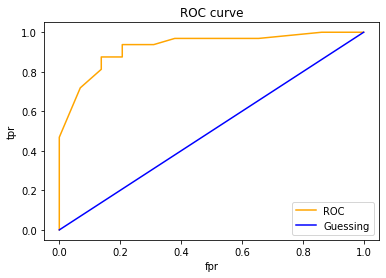

In [19]:
plot_roc_curve(fpr,tpr)


In [20]:
# if max. ROC_AUC_score , better is the model
from sklearn.metrics import roc_auc_score

max_roc = roc_auc_score(y_test,y_prob_positive)

perfect_roc = roc_auc_score(y_test,y_test)

print('max_roc_auc_score',max_roc)
print('Perfect_roc_auc_score',perfect_roc)


max_roc_auc_score 0.9256465517241379
Perfect_roc_auc_score 1.0


In [21]:
fina_result = pd.DataFrame({'Models ' : ['RFC','LinearSVC','KNN','DTC'],
                           'score' : [score_RFC_20_estimators,score_pred_L,score_knc,score_dtc]})

fina_result

,Models,score
0,RFC,0.901639
1,LinearSVC,0.836066
2,KNN,0.655738
3,DTC,0.803279


Observation : our best model is RandomForestClassifier

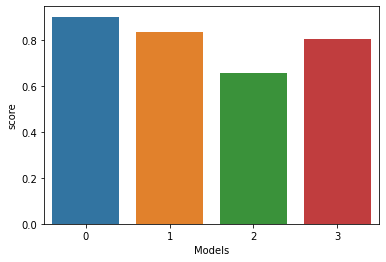

In [22]:
# visualisation

fina_result['Models']= fina_result.index

sns.barplot(x="Models", y="score", data=fina_result);

In [23]:
# train our model on entire data set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target", axis=1)
y = hd["target"]

clf = RandomForestClassifier()
clf.fit(x,y)

RandomForestClassifier()

In [24]:

new_data = pd.DataFrame({'age':52,'sex':0,'cp':0,'trestbps':140,'chol':241,'fbs':0,'restecg':1,'thalach':123,'exang':1,'oldpeak':0.2,'slope':1,'ca':0,'thal':3},index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,0,0,140,241,0,1,123,1,0.2,1,0,3


In [25]:
# Testing our RFC model on new dataset

RFC_pred = clf.predict(new_data)

if RFC_pred == 0:
    print('No Heart Disease')
    
else:
    print('You have Heart disease')



No Heart Disease


In [26]:
# saving our model

import joblib

joblib.dump(clf,'RFC_MODEL_for_heart_disease')

['RFC_MODEL_for_heart_disease']

In [27]:
# loading model

mdl = joblib.load('RFC_MODEL_for_heart_disease')

In [28]:
mdl.predict(new_data)  # model working

array([0], dtype=int64)

# GUI

In [40]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib
from pandasgui import show

In [42]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())    
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    mdl = joblib.load('RFC_MODEL_for_heart_disease')
    RFC_pred = mdl.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

    if RFC_pred == 0:
        Label(master,text="No Heart Disease").grid(row=31)
    
    else:
        Label(master,text="Possibility of Heart Disease").grid(row=31)
        
        
master = Tk()
master.title("Heart Disease Prediction system")

label=Label(master,text="Heart Disease Prediction system"
                         ,bg="black",fg="white").\
                        grid(row=0,columnspan=2)


Label(master,text="age").grid(row=1)
Label(master,text="sex(M1,F0)").grid(row=2)
Label(master,text="chest_pain").grid(row=3)
Label(master,text="resting_blood_pressure").grid(row=4)
Label(master,text="chol").grid(row=5)
Label(master,text="fbs").grid(row=6)
Label(master,text="electrocardiographic_results(0,1,2)").grid(row=7)
Label(master,text="thalach(max_heart_rate)").grid(row=8)
Label(master,text="exang").grid(row=9)
Label(master,text="oldpeak").grid(row=10)
Label(master,text="slope").grid(row=11)
Label(master,text="ca").grid(row=12)
Label(master,text="thal(0,1,2)").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 =Entry(master)
e11= Entry(master)
e12= Entry(master)
e13 =Entry(master)
        
        
e1.grid(row=1 , column=1)
e2.grid(row=2 , column=1)
e3.grid(row=3 , column=1)
e4.grid(row=4 , column=1)
e5.grid(row=5 , column=1)
e6.grid(row=6 , column=1)
e7.grid(row=7 , column=1)
e8.grid(row=8 , column=1)
e9.grid(row=9 , column=1)
e10.grid(row=10 , column=1)
e11.grid(row=11 , column=1)
e12.grid(row=12 , column=1)
e13.grid(row=13 , column=1)

Button(master,text='Predict',command=show_entry_fields).grid()
mainloop()
        